 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [85]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [86]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns, index_col="Date",parse_dates=True,infer_datetime_format=True)
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [87]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [88]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [89]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns, index_col="Date",parse_dates=True,infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [90]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [91]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [92]:
# Reading S&P 500 Closing Prices
sp500_history = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history, index_col="Date",parse_dates=True,infer_datetime_format=True)
sp500_history.sort_index(inplace= True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [68]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [69]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"] = pd.to_numeric(sp500_history["Close"])
sp500_history.dtypes

C:\Users\gohel\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [70]:
# Calculate Daily Returns
sp500_history = sp500_history.pct_change()
sp500_history.sort_index(inplace= True)
sp500_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [71]:
# Drop nulls
sp500_history = sp500_history.dropna().copy()
sp500_history.sort_index(inplace= True)
sp500_history

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [72]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history.columns = ["S&P 500 Returns"]
sp500_history.sort_index(inplace= True)
sp500_history

,S&P 500 Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [73]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_history], axis="columns", join="inner")
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

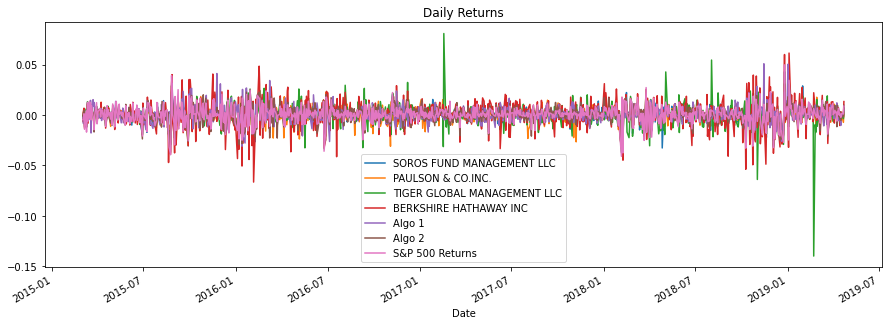

In [74]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(15,5), title= "Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

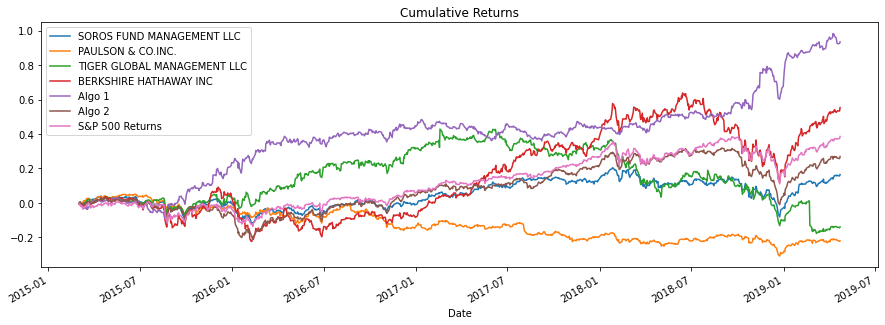

In [75]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(15,5), title= "Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk Analysis'}>

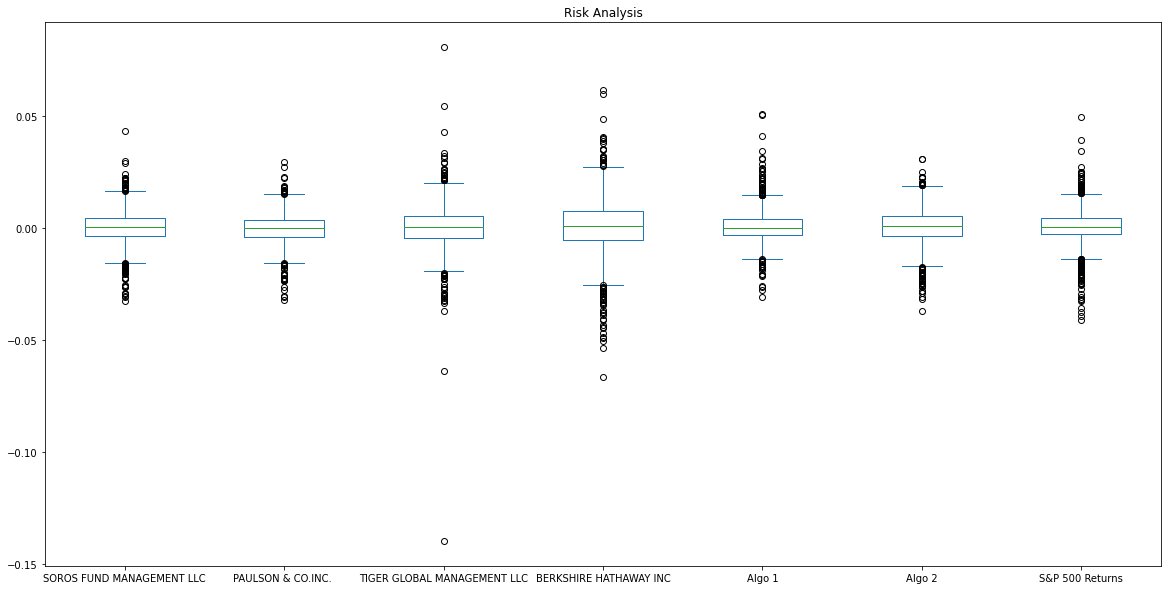

In [76]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(20,10), title= "Risk Analysis")

### Calculate Standard Deviations

In [77]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500 Returns                0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [78]:
# Calculate  the daily standard deviation of S&P 500
daily_std_sp500 = daily_std.std()
daily_std_sp500

# Determine which portfolios are riskier than the S&P 500
risk_portfolios = daily_std.loc[daily_std > daily_std_sp500]
risk_portfolios

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500 Returns                0.008554
dtype: float64

### Calculate the Annualized Standard Deviation

In [79]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500 Returns                0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

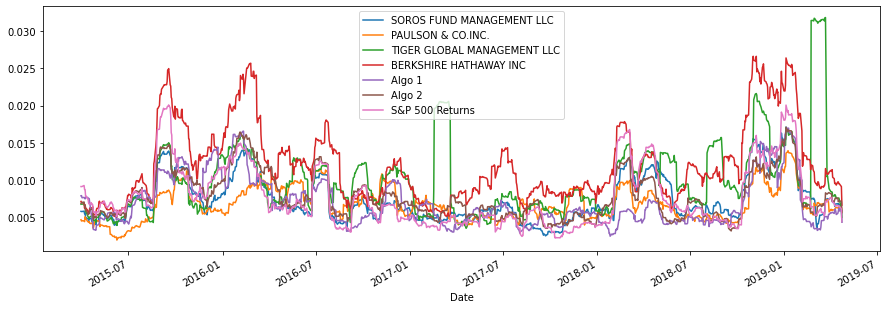

In [80]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize= (15,5))

### Calculate and plot the correlation

<AxesSubplot:>

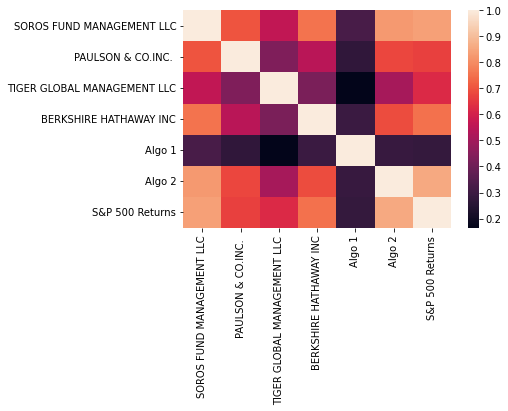

In [81]:
# Calculate the correlation
correlation = combined_returns.corr()

# Display de correlation matrix
sns.heatmap(correlation)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio
covariance = combined_returns["Algo 2"].rolling(window=60).cov(combined_returns["S&P 500"])

# Calculate variance of S&P 500
variance = combined_returns["S&P 500"].rolling(window=60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize= (20,10),title= "Beta of Algo 2 vs S&P 500")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [93]:
# Use `ewm` to calculate the rolling window
combined_returns_ewm = combined_returns.ewm(halflife=21).std()
combined_returns_ewm.dropna(inplace=True)
combined_returns_ewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
2015-03-10,0.005816,0.004707,0.006864,0.007841,0.002947,0.007315,0.008454


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [112]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500 Returns                0.648267
dtype: float64

<AxesSubplot:>

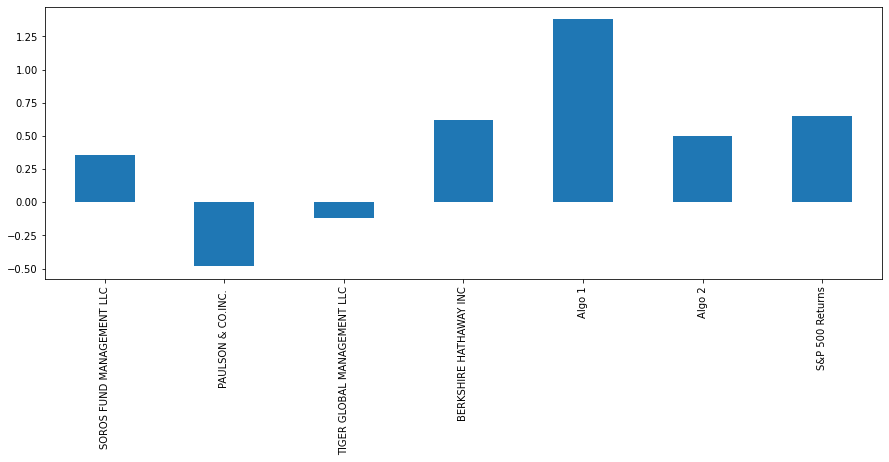

In [113]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize= (15,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [96]:
# Reading data from 1st stock (Netflix)
nflx_df = Path("Resources/NFLX_historical.csv")
nflx_df = pd.read_csv(nflx_df, index_col="Date",parse_dates=True,infer_datetime_format=True)
nflx_df.columns = ["NFLX"]
nflx_df.head()

,NFLX
Date,
2019-01-02 16:00:00,267.66
2019-01-03 16:00:00,271.20
2019-01-04 16:00:00,297.57
2019-01-07 16:00:00,315.34
2019-01-08 16:00:00,320.27


In [97]:
# Reading data from 2nd stock (Disney)
dis_df = Path("Resources/DIS_historical.csv")
dis_df = pd.read_csv(dis_df, index_col="Date",parse_dates=True,infer_datetime_format=True)
dis_df.columns = ["DIS"]
dis_df.head()

,DIS
Date,
2019-01-02 16:00:00,108.97
2019-01-03 16:00:00,106.33
2019-01-04 16:00:00,109.61
2019-01-07 16:00:00,110.56
2019-01-08 16:00:00,111.42


In [98]:
# Reading data from 3rd stock (Boeing)
ba_df = Path("Resources/ba_historical.csv")
ba_df = pd.read_csv(ba_df, index_col="Date",parse_dates=True,infer_datetime_format=True)
ba_df.columns = ["BA"]
ba_df.head()


,BA
Date,
2019-01-02 16:00:00,323.81
2019-01-03 16:00:00,310.90
2019-01-04 16:00:00,327.08
2019-01-07 16:00:00,328.11
2019-01-08 16:00:00,340.53


In [99]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([nflx_df,dis_df,ba_df],axis="columns",join="inner")
combined_stocks_df.head()

,NFLX,DIS,BA
Date,,,
2019-01-02 16:00:00,267.66,108.97,323.81
2019-01-03 16:00:00,271.20,106.33,310.90
2019-01-04 16:00:00,297.57,109.61,327.08
2019-01-07 16:00:00,315.34,110.56,328.11
2019-01-08 16:00:00,320.27,111.42,340.53


In [100]:
# Reset Date index
combined_stocks_df.sort_index(inplace=True)

In [101]:
# Calculate daily returns
combined_daily_returns = combined_stocks_df.pct_change()

# Drop NAs
combined_daily_returns.dropna(inplace=True)

# Display sample data
combined_daily_returns.head()

,NFLX,DIS,BA
Date,,,
2019-01-03 16:00:00,0.013226,-0.024227,-0.039869
2019-01-04 16:00:00,0.097235,0.030847,0.052042
2019-01-07 16:00:00,0.059717,0.008667,0.003149
2019-01-08 16:00:00,0.015634,0.007779,0.037853
2019-01-09 16:00:00,-0.000968,0.011219,0.009691


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

Date
2019-01-03 16:00:00   -0.016957
2019-01-04 16:00:00    0.060041
2019-01-07 16:00:00    0.023844
2019-01-08 16:00:00    0.020422
2019-01-09 16:00:00    0.006647
dtype: float64

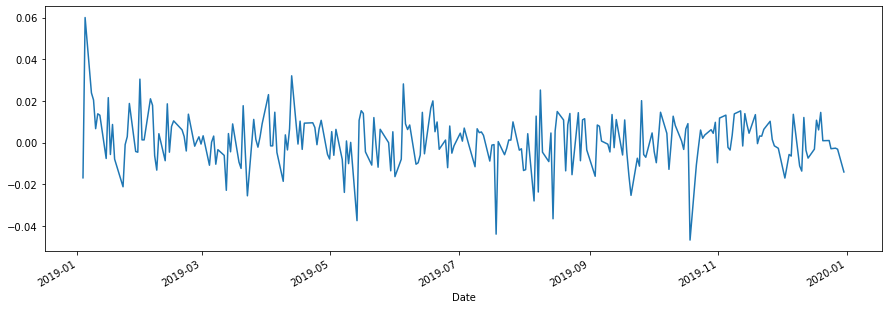

In [102]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_return = combined_daily_returns.dot(weights)

# Display sample data
weighted_return.plot(figsize=(15,5))
weighted_return.head()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [119]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat([weighted_return,combined_returns],axis="columns",join="inner")

In [120]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns.rename(columns={0:"My Portfolio"}, inplace=True)
portfolio_returns.head()


,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,,


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [123]:
# Calculate the annualized `std`
portfolio_annualized_std = annualized_std.std()
portfolio_annualized_std

0.033423272134984056

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

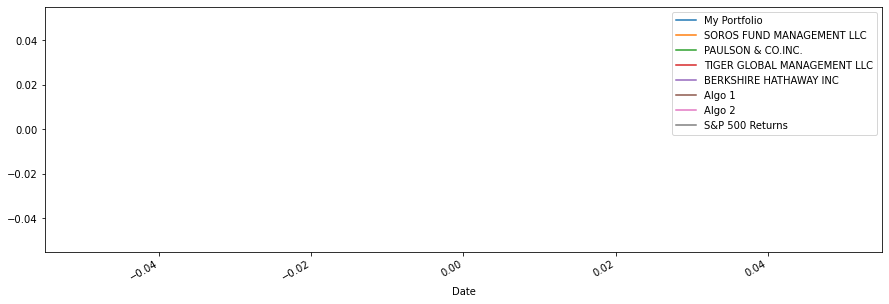

In [124]:
# Calculate rolling standard deviation
portfolio_rolling_std = portfolio_returns.rolling(window=21).std()

# Plot rolling standard deviation
portfolio_rolling_std.plot(figsize=(15,5))


### Calculate and plot the correlation

In [128]:
# Calculate and plot the correlation
corr = portfolio_returns.corr()
daily_ret = portfolio_returns.pct_change()
corr


,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
My Portfolio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOROS FUND MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAULSON & CO.INC.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S&P 500 Returns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
covariance = portfolio_returns["My Portfolio"].cov
variance = combined_returns["S&P 500"].var()
new_beta = covariance / variance
new_beta

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [129]:
# Calculate Annualized Sharpe Ratios
new_sharpe_ratios = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
new_sharpe_ratios

My Portfolio                  NaN
SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
S&P 500 Returns               NaN
dtype: float64

<AxesSubplot:>

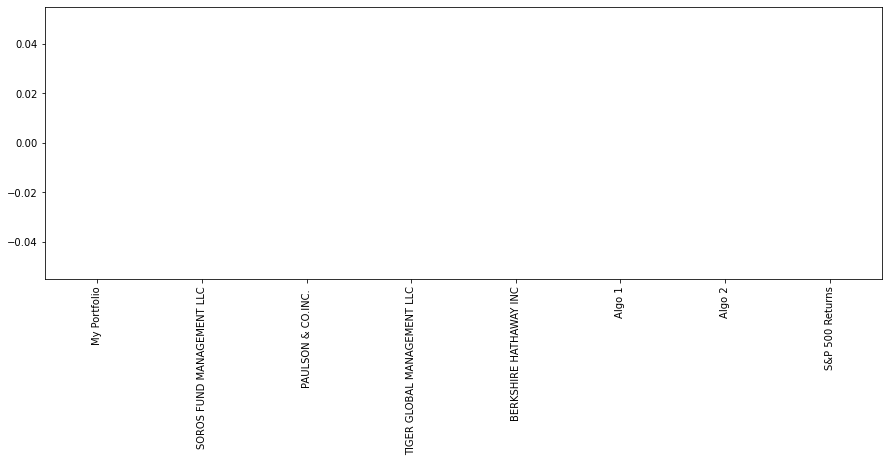

In [131]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot(kind="bar", figsize= (15,5))

### How does your portfolio do?

Write your answer here!